# Customer Spending Analysis and Sales Regression

**Task**: Analyze the relationship between customer demographics and their spending patterns to help a retail store optimize its sales strategies.

### Data Extraction
- Extract customer transaction data from a **JSON** file using **pandas**.

### Pre-Processing
- **Clean the Data**: Handle missing values, create new features such as average monthly spend, and convert categorical variables (e.g., gender, region) into numerical format.

### Data Summary
- Use **pandas** to generate summary statistics for key metrics (e.g., mean, median of monthly spend).
- **Visualization**:
    - Create histograms of numerical variables.
    - Visualize the distribution of spending relative to the categorical feature variables using boxplots.
    - Calculate pairwise correlations and create a heatmap of the values
    - Generate a scatterplot matrix to show pairwise scatterplots.

### Statistical Modeling
- Use **statsmodels** to build a **multiple linear regression model** to predict customer spending based on demographics (e.g., age, income, region).
- **Interpretation**: Analyze model coefficients to identify key drivers of spending and use the information to make business recommendations.

---

### The data has the following structure.

```
[
    {
        "customer_id": "CUST_1",
        "age": 56,
        "gender": "M",
        "region": "South",
        "income": "$68,900.00",
        "monthly_spend": "$154.82"
    },
    {
        "customer_id": "CUST_2",
        "age": 69,
        "gender": "M",
        "region": "West",
        "income": "$78,300.00",
        "monthly_spend": "$160.97"
    },
    {
        "customer_id": "CUST_3",
        "age": 46,
        "gender": "M",
        "region": "West",
        "income": "$40,000.00",
        "monthly_spend": "$141.76"
    },
    ...
]

```

Run the code block below to store the data as `customers_json`.

In [ ]:
# @title
customers_json="""
[
  {
    "customer_id": "CUST_1",
    "age": 56,
    "gender": "M",
    "region": "South",
    "income": "$68,900.00",
    "monthly_spend": "$154.82"
  },
  {
    "customer_id": "CUST_2",
    "age": 69,
    "gender": "M",
    "region": "West",
    "income": "$78,300.00",
    "monthly_spend": "$160.97"
  },
  {
    "customer_id": "CUST_3",
    "age": 46,
    "gender": "M",
    "region": "West",
    "income": "$40,000.00",
    "monthly_spend": "$141.76"
  },
  {
    "customer_id": "CUST_4",
    "age": 32,
    "gender": "M",
    "region": "North",
    "income": "$30,200.00",
    "monthly_spend": "$102.35"
  },
  {
    "customer_id": "CUST_5",
    "age": 60,
    "gender": "M",
    "region": "South",
    "income": "$73,900.00",
    "monthly_spend": "$207.71"
  },
  {
    "customer_id": "CUST_6",
    "age": 25,
    "gender": "F",
    "region": "West",
    "income": "$36,100.00",
    "monthly_spend": "$95.25"
  },
  {
    "customer_id": "CUST_7",
    "age": 38,
    "gender": "M",
    "region": "North",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_8",
    "age": 56,
    "gender": "F",
    "region": "South",
    "income": "$58,300.00",
    "monthly_spend": "$180.21"
  },
  {
    "customer_id": "CUST_9",
    "age": 36,
    "gender": "F",
    "region": "East",
    "income": "$39,600.00",
    "monthly_spend": "$120.70"
  },
  {
    "customer_id": "CUST_10",
    "age": 40,
    "gender": "F",
    "region": "North",
    "income": "$51,200.00",
    "monthly_spend": "$149.48"
  },
  {
    "customer_id": "CUST_11",
    "age": 28,
    "gender": "M",
    "region": "West",
    "income": "$45,500.00",
    "monthly_spend": "$163.53"
  },
  {
    "customer_id": "CUST_12",
    "age": 28,
    "gender": "M",
    "region": "East",
    "income": "$33,700.00",
    "monthly_spend": "$107.85"
  },
  {
    "customer_id": "CUST_13",
    "age": 41,
    "gender": "M",
    "region": "East",
    "income": "$57,700.00",
    "monthly_spend": "$153.59"
  },
  {
    "customer_id": "CUST_14",
    "age": 53,
    "gender": "M",
    "region": "East",
    "income": "$66,700.00",
    "monthly_spend": "$158.25"
  },
  {
    "customer_id": "CUST_15",
    "age": 57,
    "gender": "F",
    "region": "North",
    "income": "$64,100.00",
    "monthly_spend": "$214.89"
  },
  {
    "customer_id": "CUST_16",
    "age": 41,
    "gender": "M",
    "region": "West",
    "income": "$31,600.00",
    "monthly_spend": "$114.65"
  },
  {
    "customer_id": "CUST_17",
    "age": 20,
    "gender": "M",
    "region": "East",
    "income": "$14,700.00",
    "monthly_spend": "$88.62"
  },
  {
    "customer_id": "CUST_18",
    "age": 39,
    "gender": "M",
    "region": "South",
    "income": "$51,400.00",
    "monthly_spend": "$146.56"
  },
  {
    "customer_id": "CUST_19",
    "age": 19,
    "gender": "M",
    "region": "East",
    "income": "$6,900.00",
    "monthly_spend": "$123.91"
  },
  {
    "customer_id": "CUST_20",
    "age": 41,
    "gender": "M",
    "region": "East",
    "income": "$47,200.00",
    "monthly_spend": "$88.24"
  },
  {
    "customer_id": "CUST_21",
    "age": 61,
    "gender": "F",
    "region": "North",
    "income": "$76,000.00",
    "monthly_spend": "$285.70"
  },
  {
    "customer_id": "CUST_22",
    "age": 47,
    "gender": "M",
    "region": "North",
    "income": "$53,500.00",
    "monthly_spend": "$160.45"
  },
  {
    "customer_id": "CUST_23",
    "age": 55,
    "gender": "F",
    "region": "West",
    "income": "$54,000.00",
    "monthly_spend": "$195.40"
  },
  {
    "customer_id": "CUST_24",
    "age": 19,
    "gender": "M",
    "region": "South",
    "income": "$15,500.00",
    "monthly_spend": "$72.56"
  },
  {
    "customer_id": "CUST_25",
    "age": 38,
    "gender": "F",
    "region": "North",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_26",
    "age": 50,
    "gender": "M",
    "region": "East",
    "income": "$59,700.00",
    "monthly_spend": "$160.57"
  },
  {
    "customer_id": "CUST_27",
    "age": 29,
    "gender": "M",
    "region": "West",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_28",
    "age": 39,
    "gender": "F",
    "region": "East",
    "income": "$54,700.00",
    "monthly_spend": "$188.40"
  },
  {
    "customer_id": "CUST_29",
    "age": 61,
    "gender": "F",
    "region": "East",
    "income": "$74,500.00",
    "monthly_spend": "$269.57"
  },
  {
    "customer_id": "CUST_30",
    "age": 42,
    "gender": "F",
    "region": "North",
    "income": "$64,900.00",
    "monthly_spend": "$216.97"
  },
  {
    "customer_id": "CUST_31",
    "age": 66,
    "gender": "M",
    "region": "West",
    "income": "$76,700.00",
    "monthly_spend": "$171.68"
  },
  {
    "customer_id": "CUST_32",
    "age": 44,
    "gender": "F",
    "region": "South",
    "income": "$47,400.00",
    "monthly_spend": "$137.99"
  },
  {
    "customer_id": "CUST_33",
    "age": 59,
    "gender": "M",
    "region": "South",
    "income": "$62,600.00",
    "monthly_spend": "$161.65"
  },
  {
    "customer_id": "CUST_34",
    "age": 45,
    "gender": "M",
    "region": "North",
    "income": "$30,700.00",
    "monthly_spend": "$214.20"
  },
  {
    "customer_id": "CUST_35",
    "age": 33,
    "gender": "F",
    "region": "North",
    "income": "$39,500.00",
    "monthly_spend": "$104.81"
  },
  {
    "customer_id": "CUST_36",
    "age": 32,
    "gender": "F",
    "region": "West",
    "income": "$36,800.00",
    "monthly_spend": "$123.93"
  },
  {
    "customer_id": "CUST_37",
    "age": 64,
    "gender": "M",
    "region": "South",
    "income": "$55,700.00",
    "monthly_spend": "$183.65"
  },
  {
    "customer_id": "CUST_38",
    "age": 68,
    "gender": "M",
    "region": "South",
    "income": "$72,700.00",
    "monthly_spend": "$185.24"
  },
  {
    "customer_id": "CUST_39",
    "age": 61,
    "gender": "F",
    "region": "South",
    "income": "$79,400.00",
    "monthly_spend": "$229.05"
  },
  {
    "customer_id": "CUST_40",
    "age": 69,
    "gender": "F",
    "region": "East",
    "income": "$66,700.00",
    "monthly_spend": "$308.71"
  },
  {
    "customer_id": "CUST_41",
    "age": 20,
    "gender": "F",
    "region": "South",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_42",
    "age": 54,
    "gender": "M",
    "region": "East",
    "income": "$70,000.00",
    "monthly_spend": "$165.64"
  },
  {
    "customer_id": "CUST_43",
    "age": 68,
    "gender": "M",
    "region": "West",
    "income": "$79,300.00",
    "monthly_spend": "$196.70"
  },
  {
    "customer_id": "CUST_44",
    "age": 24,
    "gender": "M",
    "region": "East",
    "income": "$59,600.00",
    "monthly_spend": "$95.68"
  },
  {
    "customer_id": "CUST_45",
    "age": 38,
    "gender": "M",
    "region": "West",
    "income": "$29,800.00",
    "monthly_spend": "$85.88"
  },
  {
    "customer_id": "CUST_46",
    "age": 26,
    "gender": "M",
    "region": "South",
    "income": "$38,200.00",
    "monthly_spend": "$114.83"
  },
  {
    "customer_id": "CUST_47",
    "age": 56,
    "gender": "M",
    "region": "South",
    "income": "$64,200.00",
    "monthly_spend": "$211.44"
  },
  {
    "customer_id": "CUST_48",
    "age": 35,
    "gender": "F",
    "region": "West",
    "income": "$40,600.00",
    "monthly_spend": "$172.79"
  },
  {
    "customer_id": "CUST_49",
    "age": 21,
    "gender": "M",
    "region": "North",
    "income": "$35,100.00",
    "monthly_spend": "$101.30"
  },
  {
    "customer_id": "CUST_50",
    "age": 42,
    "gender": "M",
    "region": "West",
    "income": "$46,700.00",
    "monthly_spend": "$138.42"
  },
  {
    "customer_id": "CUST_51",
    "age": 31,
    "gender": "M",
    "region": "North",
    "income": "$16,600.00",
    "monthly_spend": "$98.34"
  },
  {
    "customer_id": "CUST_52",
    "age": 67,
    "gender": "F",
    "region": "East",
    "income": "$63,500.00",
    "monthly_spend": "$275.39"
  },
  {
    "customer_id": "CUST_53",
    "age": 26,
    "gender": "M",
    "region": "East",
    "income": "$44,600.00",
    "monthly_spend": "$98.66"
  },
  {
    "customer_id": "CUST_54",
    "age": 43,
    "gender": "M",
    "region": "East",
    "income": "$59,700.00",
    "monthly_spend": "$110.43"
  },
  {
    "customer_id": "CUST_55",
    "age": 19,
    "gender": "F",
    "region": "South",
    "income": "$20,300.00",
    "monthly_spend": "$63.84"
  },
  {
    "customer_id": "CUST_56",
    "age": 37,
    "gender": "M",
    "region": "East",
    "income": "$47,000.00",
    "monthly_spend": "$130.98"
  },
  {
    "customer_id": "CUST_57",
    "age": 45,
    "gender": "M",
    "region": "North",
    "income": "$77,800.00",
    "monthly_spend": "$182.92"
  },
  {
    "customer_id": "CUST_58",
    "age": 64,
    "gender": "M",
    "region": "East",
    "income": "$68,700.00",
    "monthly_spend": "$186.29"
  },
  {
    "customer_id": "CUST_59",
    "age": 24,
    "gender": "M",
    "region": "West",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_60",
    "age": 61,
    "gender": "M",
    "region": "West",
    "income": "$67,900.00",
    "monthly_spend": "$186.91"
  },
  {
    "customer_id": "CUST_61",
    "age": 25,
    "gender": "F",
    "region": "South",
    "income": "$36,100.00",
    "monthly_spend": "$143.27"
  },
  {
    "customer_id": "CUST_62",
    "age": 64,
    "gender": "F",
    "region": "West",
    "income": "$65,500.00",
    "monthly_spend": "$259.23"
  },
  {
    "customer_id": "CUST_63",
    "age": 52,
    "gender": "F",
    "region": "North",
    "income": "$63,100.00",
    "monthly_spend": "$250.53"
  },
  {
    "customer_id": "CUST_64",
    "age": 31,
    "gender": "M",
    "region": "East",
    "income": "$16,600.00",
    "monthly_spend": "$80.94"
  },
  {
    "customer_id": "CUST_65",
    "age": 34,
    "gender": "M",
    "region": "South",
    "income": "$42,400.00",
    "monthly_spend": "$63.71"
  },
  {
    "customer_id": "CUST_66",
    "age": 53,
    "gender": "M",
    "region": "East",
    "income": "$58,500.00",
    "monthly_spend": "$149.96"
  },
  {
    "customer_id": "CUST_67",
    "age": 67,
    "gender": "F",
    "region": "East",
    "income": "$69,800.00",
    "monthly_spend": "$207.89"
  },
  {
    "customer_id": "CUST_68",
    "age": 57,
    "gender": "M",
    "region": "North",
    "income": "$57,200.00",
    "monthly_spend": "$184.90"
  },
  {
    "customer_id": "CUST_69",
    "age": 21,
    "gender": "M",
    "region": "West",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_70",
    "age": 19,
    "gender": "F",
    "region": "West",
    "income": "$15,900.00",
    "monthly_spend": "$51.42"
  },
  {
    "customer_id": "CUST_71",
    "age": 23,
    "gender": "M",
    "region": "East",
    "income": "$4,800.00",
    "monthly_spend": "$72.54"
  },
  {
    "customer_id": "CUST_72",
    "age": 59,
    "gender": "F",
    "region": "South",
    "income": "$61,300.00",
    "monthly_spend": "$171.41"
  },
  {
    "customer_id": "CUST_73",
    "age": 21,
    "gender": "F",
    "region": "West",
    "income": "$37,000.00",
    "monthly_spend": "$181.68"
  },
  {
    "customer_id": "CUST_74",
    "age": 46,
    "gender": "F",
    "region": "South",
    "income": "$47,600.00",
    "monthly_spend": "$200.97"
  },
  {
    "customer_id": "CUST_75",
    "age": 35,
    "gender": "M",
    "region": "West",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_76",
    "age": 43,
    "gender": "M",
    "region": "South",
    "income": "$37,200.00",
    "monthly_spend": "$146.50"
  },
  {
    "customer_id": "CUST_77",
    "age": 61,
    "gender": "M",
    "region": "North",
    "income": "$52,900.00",
    "monthly_spend": "$188.95"
  },
  {
    "customer_id": "CUST_78",
    "age": 51,
    "gender": "M",
    "region": "South",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_79",
    "age": 27,
    "gender": "M",
    "region": "North",
    "income": "$21,700.00",
    "monthly_spend": "$87.86"
  },
  {
    "customer_id": "CUST_80",
    "age": 53,
    "gender": "M",
    "region": "North",
    "income": "$46,200.00",
    "monthly_spend": "$117.10"
  },
  {
    "customer_id": "CUST_81",
    "age": 31,
    "gender": "M",
    "region": "South",
    "income": "$40,500.00",
    "monthly_spend": "$95.58"
  },
  {
    "customer_id": "CUST_82",
    "age": 48,
    "gender": "F",
    "region": "North",
    "income": "$70,800.00",
    "monthly_spend": "$203.15"
  },
  {
    "customer_id": "CUST_83",
    "age": 65,
    "gender": "M",
    "region": "East",
    "income": "$63,300.00",
    "monthly_spend": "$115.04"
  },
  {
    "customer_id": "CUST_84",
    "age": 32,
    "gender": "F",
    "region": "North",
    "income": "$20,100.00",
    "monthly_spend": "$177.60"
  },
  {
    "customer_id": "CUST_85",
    "age": 25,
    "gender": "M",
    "region": "West",
    "income": "$36,600.00",
    "monthly_spend": "$58.38"
  },
  {
    "customer_id": "CUST_86",
    "age": 31,
    "gender": "M",
    "region": "South",
    "income": "$21,600.00",
    "monthly_spend": "$122.28"
  },
  {
    "customer_id": "CUST_87",
    "age": 40,
    "gender": "M",
    "region": "East",
    "income": "$33,200.00",
    "monthly_spend": "$122.40"
  },
  {
    "customer_id": "CUST_88",
    "age": 57,
    "gender": "F",
    "region": "South",
    "income": "$66,900.00",
    "monthly_spend": "$228.90"
  },
  {
    "customer_id": "CUST_89",
    "age": 38,
    "gender": "F",
    "region": "West",
    "income": "$41,300.00",
    "monthly_spend": "$150.61"
  },
  {
    "customer_id": "CUST_90",
    "age": 33,
    "gender": "F",
    "region": "West",
    "income": "$31,100.00",
    "monthly_spend": "$156.62"
  },
  {
    "customer_id": "CUST_91",
    "age": 62,
    "gender": "F",
    "region": "West",
    "income": "$67,700.00",
    "monthly_spend": "$214.57"
  },
  {
    "customer_id": "CUST_92",
    "age": 35,
    "gender": "M",
    "region": "North",
    "income": "$35,900.00",
    "monthly_spend": "$106.55"
  },
  {
    "customer_id": "CUST_93",
    "age": 64,
    "gender": "F",
    "region": "North",
    "income": "$87,900.00",
    "monthly_spend": "$217.77"
  },
  {
    "customer_id": "CUST_94",
    "age": 41,
    "gender": "M",
    "region": "South",
    "income": "$39,200.00",
    "monthly_spend": "$169.25"
  },
  {
    "customer_id": "CUST_95",
    "age": 43,
    "gender": "M",
    "region": "South",
    "income": null,
    "monthly_spend": "$nan"
  },
  {
    "customer_id": "CUST_96",
    "age": 42,
    "gender": "F",
    "region": "East",
    "income": "$42,400.00",
    "monthly_spend": "$181.27"
  },
  {
    "customer_id": "CUST_97",
    "age": 62,
    "gender": "F",
    "region": "East",
    "income": "$62,900.00",
    "monthly_spend": "$198.33"
  },
  {
    "customer_id": "CUST_98",
    "age": 58,
    "gender": "F",
    "region": "South",
    "income": "$69,000.00",
    "monthly_spend": "$215.32"
  },
  {
    "customer_id": "CUST_99",
    "age": 46,
    "gender": "F",
    "region": "North",
    "income": "$31,100.00",
    "monthly_spend": "$142.83"
  },
  {
    "customer_id": "CUST_100",
    "age": 32,
    "gender": "F",
    "region": "West",
    "income": null,
    "monthly_spend": "$nan"
  }
]
"""

# **Import the necessary libraries**

In [ ]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as smf
from pandas.plotting import scatter_matrix

# **Converting JSON Data to a DataFrame**

In [ ]:
# Convert the data from JSON format into a Python object
data=json.loads(customers_json)

# Convert data to DataFrame
df = pd.DataFrame(data)

# Examine the first few rows of the data frame
df.head()

,customer_id,age,gender,region,income,monthly_spend
0,CUST_1,56,M,South,"$68,900.00",$154.82
1,CUST_2,69,M,West,"$78,300.00",$160.97
2,CUST_3,46,M,West,"$40,000.00",$141.76
3,CUST_4,32,M,North,"$30,200.00",$102.35
4,CUST_5,60,M,South,"$73,900.00",$207.71


# **Convert to float**

In [ ]:
df['income']=df['income'].str.replace('$','')
df['income']=df['income'].str.replace(',','').astype(float)

In [ ]:
df['monthly_spend']=df['monthly_spend'].str.replace('$','')
df['monthly_spend']=df['monthly_spend'].str.replace(',','').astype(float)

In [ ]:
df['gender_encoded'] = df['gender'].map({'M': 0, 'F': 1})

# **Handling Missing Values**

In [ ]:
# Handle missing values
# Replace missing income and monthly spend with median
median_income = df['income'].median()
median_monthly_spend = df['monthly_spend'].median()


df['income'] = df['income'].fillna(median_income)
df['monthly_spend'] = df['monthly_spend'].fillna(median_monthly_spend)

# Examine the data frame
df.head()

,customer_id,age,gender,region,income,monthly_spend,gender_encoded
0,CUST_1,56,M,South,68900.0,154.82,0
1,CUST_2,69,M,West,78300.0,160.97,0
2,CUST_3,46,M,West,40000.0,141.76,0
3,CUST_4,32,M,North,30200.0,102.35,0
4,CUST_5,60,M,South,73900.0,207.71,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     100 non-null    object 
 1   age             100 non-null    int64  
 2   gender          100 non-null    object 
 3   region          100 non-null    object 
 4   income          100 non-null    float64
 5   monthly_spend   100 non-null    float64
 6   gender_encoded  100 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB


# **Feature Engineering**

In [ ]:
def average_spend(row):
    incom = row['income']
    ms = row['monthly_spend']

    ratio = incom / ms

    # Check for missing or zero performance score
    if pd.isna(incom) or pd.isna(ms) or ms == 0:
        return None  # Return None for invalid cases
    else:
        return round(ratio, 2)

# Adding the new column to the DataFrame
df['average_spending'] = df.apply(average_spend, axis=1)
df.head()

,customer_id,age,gender,region,income,monthly_spend,gender_encoded,average_spending
0,CUST_1,56,M,South,68900.0,154.82,0,445.03
1,CUST_2,69,M,West,78300.0,160.97,0,486.43
2,CUST_3,46,M,West,40000.0,141.76,0,282.17
3,CUST_4,32,M,North,30200.0,102.35,0,295.07
4,CUST_5,60,M,South,73900.0,207.71,0,355.78


# **Data Summary**

In [ ]:
df.describe()

,age,income,monthly_spend,gender_encoded,average_spending
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,43.350000,49359.000000,156.699700,0.400000,322.652900
std,14.904663,18103.078007,52.240414,0.492366,103.797584
min,19.000000,4800.000000,51.420000,0.000000,55.690000
25%,31.750000,36950.000000,116.585000,0.000000,273.475000
50%,42.000000,49400.000000,157.435000,0.000000,313.780000
75%,57.000000,63650.000000,186.445000,1.000000,364.655000
max,69.000000,87900.000000,308.710000,1.000000,665.520000


# **Visualization**

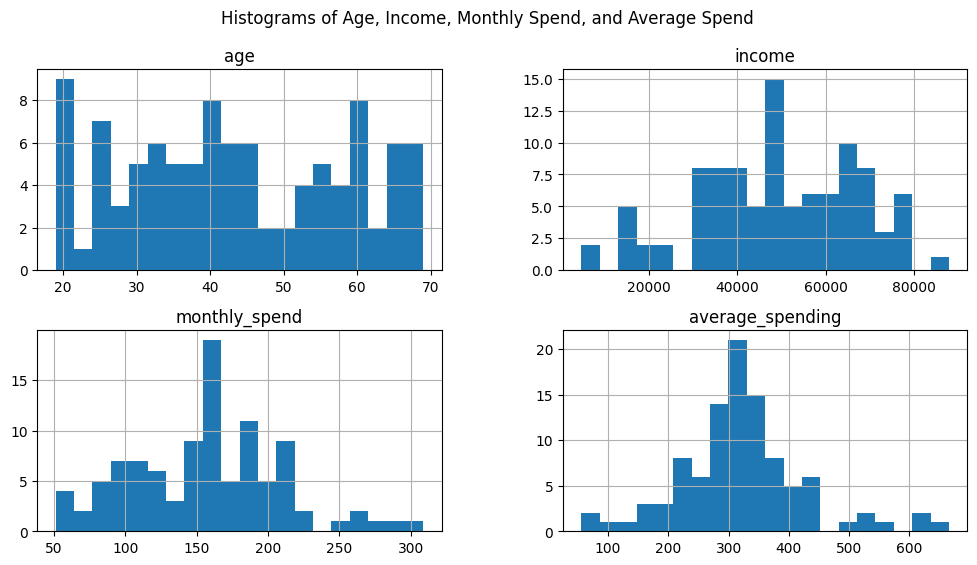

In [ ]:
df[['age', 'income', 'monthly_spend', 'average_spending']].hist(bins=20, figsize=(12, 6))
plt.suptitle('Histograms of Age, Income, Monthly Spend, and Average Spend')
plt.show()

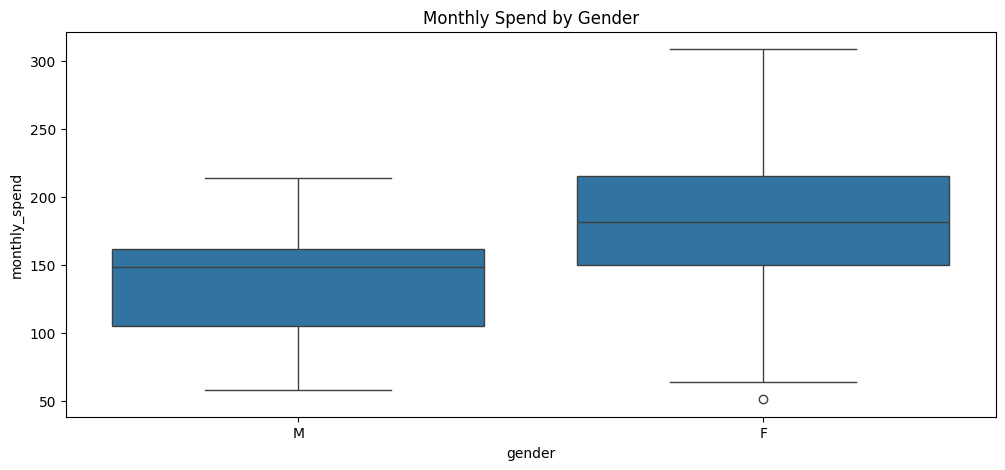

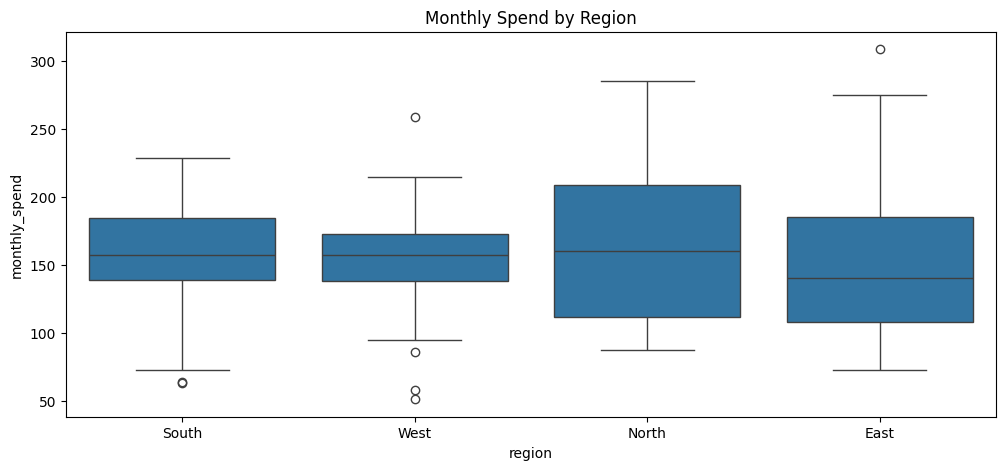

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='gender', y='monthly_spend', data=df)
plt.title('Monthly Spend by Gender')
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x='region', y='monthly_spend', data=df)
plt.title('Monthly Spend by Region')
plt.show()


# **Encoding Categorical Variables with Dummy Variables**

In [ ]:
df = pd.get_dummies(df, columns=['region'], drop_first=True)
df.head()

,customer_id,age,gender,income,monthly_spend,gender_encoded,average_spending,region_North,region_South,region_West
0,CUST_1,56,M,68900.0,154.82,0,445.03,False,True,False
1,CUST_2,69,M,78300.0,160.97,0,486.43,False,False,True
2,CUST_3,46,M,40000.0,141.76,0,282.17,False,False,True
3,CUST_4,32,M,30200.0,102.35,0,295.07,True,False,False
4,CUST_5,60,M,73900.0,207.71,0,355.78,False,True,False


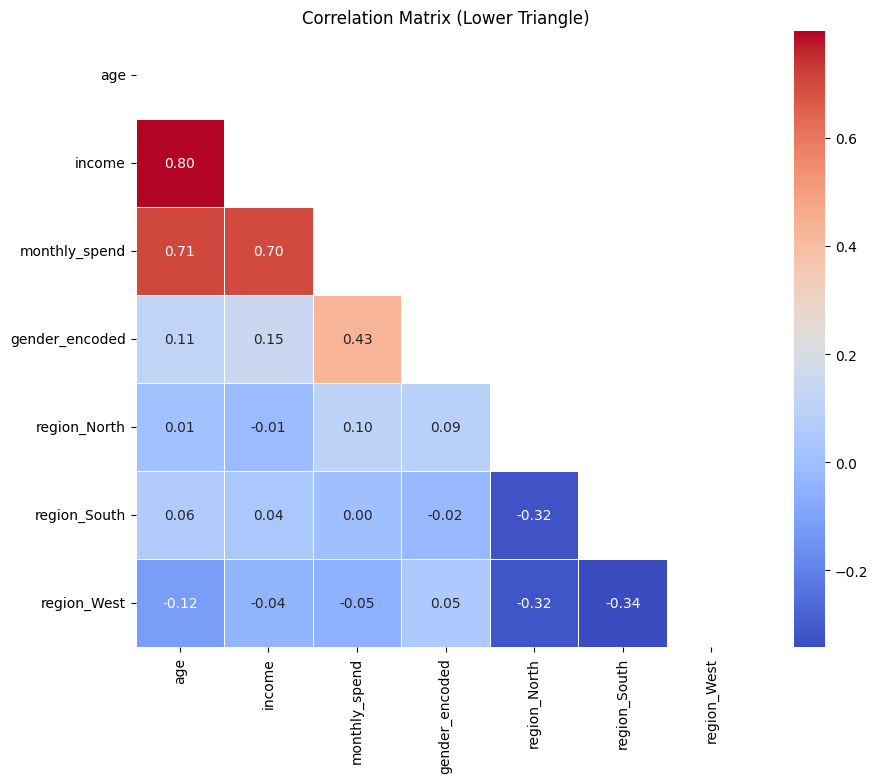

In [ ]:
correlation_matrix = df[['age', 'income', 'monthly_spend', 'gender_encoded'] + [col for col in df.columns if col.startswith('region_')]].corr()

# Create mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', mask=mask, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Lower Triangle)')
plt.show()

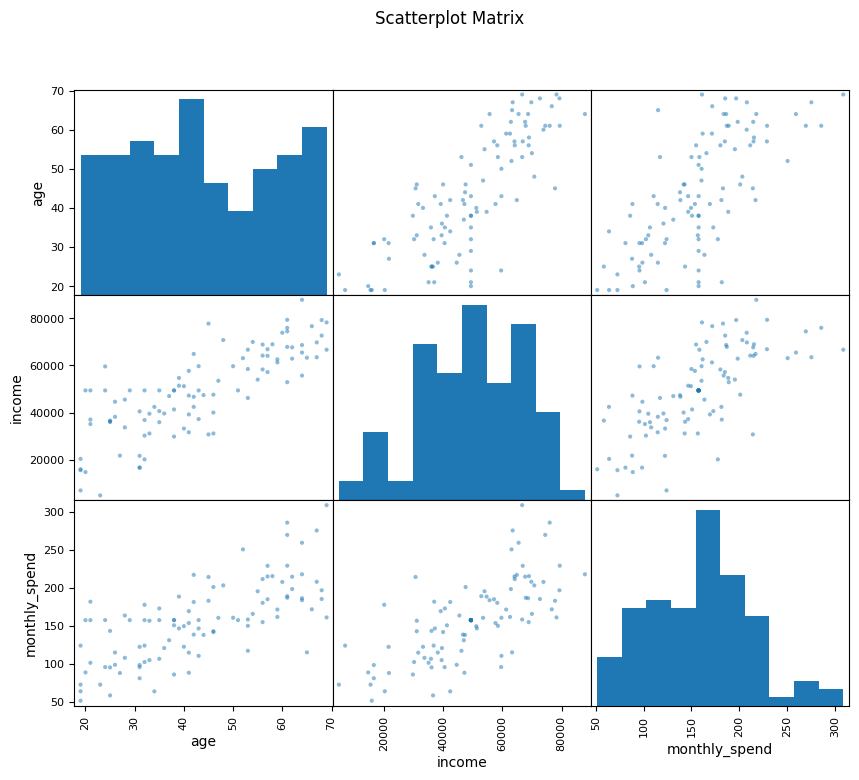

In [ ]:
scatter_matrix(df[['age', 'income', 'monthly_spend']], figsize=(10, 8))
plt.suptitle('Scatterplot Matrix')
plt.show()

# **STATISTICAL MODELING**

In [ ]:
import statsmodels.formula.api as sm

# Define the formula for the multiple linear regression
formula = (
     'monthly_spend ~ age + income + region_North + region_South + region_West'
)

# Fit the model
model = sm.ols(formula=formula, data=df).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          monthly_spend   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     24.37
Date:                Fri, 02 May 2025   Prob (F-statistic):           1.17e-15
Time:                        21:08:13   Log-Likelihood:                -495.41
No. Observations:                 100   AIC:                             1003.
Df Residuals:                      94   BIC:                             1018.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               34.5326 

# **Interpretation of Regression Results**

R-squared (0.565)
  - Interpretation:
    - The model explains 56.5% of the variance in monthly spend. This means that while the model provides useful insights, there is still a significant portion of spending behavior that is not explained by the variables in the model.
    - Other factors not included in the model may influence spending.

Significant Coefficients
  - Age (1.4334)
    - The coefficient for age suggests that for each additional year of age, a customer’s monthly spend increases by 1.43 units
      - This indicates that older customers tend to spend more on average.
  
  - Income (0.0011)
    - For each additional unit of income, the monthly spend increases by 0.0011 units.
      - This means that as customers earn more, they tend to spend slightly more each month.
  
Non-significant Coefficients
  - Region (North, South, West)
    - None of the regional variables (North, South, West) are statistically significant, with p-values well above the 0.05 threshold (ranging from 0.127 to 0.788).

# **Business Recommendations**

- Target Older and Higher-Income Customers: Focus marketing efforts on older customers and those with higher incomes, as both demographics are significant drivers of increased monthly spending.

- Personalized and Exclusive Offers: Use income and age data to provide tailored recommendations, upsell opportunities, and loyalty programs that encourage increased spending from older and high-income customers.